In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
class EchoStateNetwork:
	def __init__(self, reservoir_size, spectral_radius=0.9):
		# Initialize network parameters
		self.reservoir_size = reservoir_size

		# Reservoir weights
		self.W_res = np.random.rand(reservoir_size, reservoir_size) - 0.5
		self.W_res *= spectral_radius / \
			np.max(np.abs(np.linalg.eigvals(self.W_res)))

		# Input weights
		self.W_in = np.random.rand(reservoir_size, 1) - 0.5

		# Output weights (to be trained)
		self.W_out = None

	def train(self, input_data, target_data):
		# Run reservoir with input data
		reservoir_states = self.run_reservoir(input_data)

		# Train the output weights using pseudo-inverse
		self.W_out = np.dot(np.linalg.pinv(reservoir_states), target_data)

	def predict(self, input_data):
		# Run reservoir with input data
		reservoir_states = self.run_reservoir(input_data)

		# Make predictions using the trained output weights
		predictions = np.dot(reservoir_states, self.W_out)

		return predictions

	def run_reservoir(self, input_data):
		# Initialize reservoir states
		reservoir_states = np.zeros((len(input_data), self.reservoir_size))

		# Run the reservoir
		for t in range(1, len(input_data)):
			reservoir_states[t, :] = np.tanh(
				np.dot(
					self.W_res, reservoir_states[t - 1, :]) + np.dot(self.W_in, input_data[t])
			)

		return reservoir_states


In [128]:
    # Generate synthetic data (input: random noise, target: sine wave)
time = np.arange(0, 54, 1)

# Load data from CSV file
csv_file_path = 'C:/Users/HP/Documents/mYFILEs/Base_case.csv'
df = pd.read_csv(csv_file_path)

# Extract input and output variables
injectionrate1 = df[['injectionrate1']]  # Replace with your actual column names
Cumoilprod1 = df['Cumwatprod2']  # Replace with your actual column name

print(injectionrate1, Cumoilprod1)
  

# Create an Echo State Network
reservoir_size = 40

esn = EchoStateNetwork(reservoir_size)


    injectionrate1
0         0.000000
1         0.000001
2         0.000003
3         0.000004
4         0.000006
5         0.000007
6         0.000009
7         0.000010
8         0.000012
9         0.000013
10        0.000015
11        0.000016
12        0.000017
13        0.000019
14        0.000020
15        0.000022
16        0.000023
17        0.000025
18        0.000026
19        0.000028
20        0.000029
21        0.000030
22        0.000032
23        0.000033
24        0.000035
25        0.000036
26        0.000038
27        0.000039
28        0.000041
29        0.000042
30        0.000044
31        0.000045
32        0.000046
33        0.000048
34        0.000049
35        0.000051
36        0.000052
37        0.000054
38        0.000055
39        0.000056
40        0.000058
41        0.000059
42        0.000061
43        0.000062
44        0.000064
45        0.000065
46        0.000067
47        0.000068
48        0.000070
49        0.000071
50        0.000073
51        0.

In [129]:
# incorperate training and testing data
training_input = injectionrate1.values
training_target = Cumoilprod1.values

# Train the ESN
esn.train(training_input, training_target)

# Generate test data (similar to training data for simplicity)
test_input = training_input

In [130]:


# Make predictions
predictions = esn.predict(test_input)



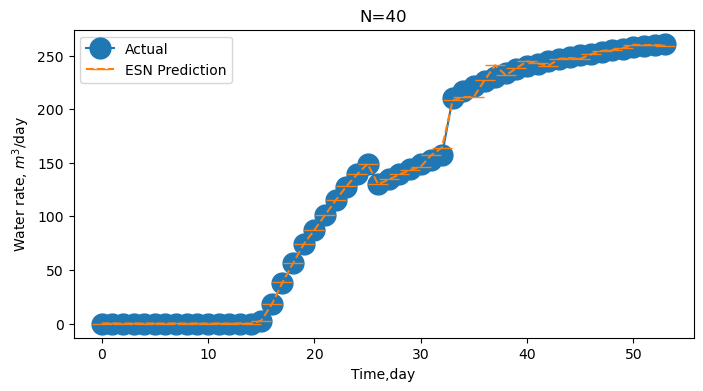

In [131]:
# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(time, training_target, label='Actual',
		linestyle='-', marker='o', markersize='15')
plt.plot(time, predictions, linestyle='--', label='ESN Prediction', marker='_', markersize='15') #label='ESN Prediction',
plt.xlabel('Time,day')
plt.ylabel('Water rate, $m^3$/day')
plt.legend()
plt.title('N=40')
plt.show()


In [70]:
np.savetxt('predictions2.csv', predictions, delimiter=',')

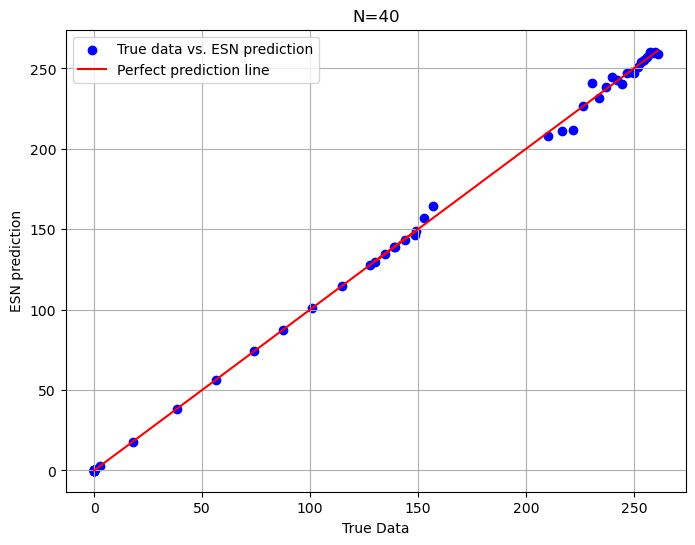

0.9993099218189406


In [132]:
plt.figure(figsize=(8, 6))
plt.scatter(training_target, predictions, color='blue', label='True data vs. ESN prediction')
plt.plot(training_target, training_target, color='red', label='Perfect prediction line')

plt.title('N=40')
plt.xlabel('True Data')
plt.ylabel('ESN prediction')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R-squared value
r_squared = r2_score(training_target, predictions)
print(r_squared)